# Klyngeanalyse - en verden af mønstre

I dag skal vi snakke om klyngeanalyse **clustering**;

Klyngeanalyse er et værktøj designet til at finde mønstre i data som vi ellers ikke havde opdaget - på alle mulige forskellige måder.

Klyngeanalyse er et sæt af algoritmer der er designet til at... finde klynger i data. Surprise :D

Celebs that enjoy clustering:

![tech-giants](https://4.bp.blogspot.com/-X7BHS66c1U8/UlX7OcLfnWI/AAAAAAAABnU/83lHDaDPeng/s1600/logos.png)

Men hvorfor kan de godt lide at lege med klynger?

Fordi de er pjattede med profitmaksimering! Hvis man rammer det rigtige segment, så er der cool cash.

![old](https://www.fish-marketing.com/site/wp-content/uploads/2018/01/blog.jpg)

Lad os importere det stads vi skal bruge - først! Ikke drypvis - det er klamt.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


De primære pakker vi skal bruge er:
* Pandas
* Matplotlib
* Scikit-learn (her sklearn)
* Scipy

Til dem af jer der har hørt mig fable om klyngeanalyse tidligere vil kunne genkende det her data. Det er værdiundersøgelsen 1999 - det er mega gammelt, men det er også mega sjovt. Imma go for it.

Data er her:

In [3]:
cluster_df=pd.read_csv("https://raw.githubusercontent.com/RolfLund/NDSM/main/value99_dataset.csv")

In [4]:
cluster_df.head()

,gender,income,criminals,diffrace,leftwings,alcoholics,rightwings,manykids,neurotics,muslims,imigrants,aids,addicts,homoseksuals,jews,gypsies,age,edu,id
0,2,900000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48,4,1
1,1,180000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,30,4,2
2,1,600000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,3,3
3,2,180000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,55,0,4
4,2,60000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,0,5


In [5]:
cluster_df.columns

Index(['gender', 'income', 'criminals', 'diffrace', 'leftwings', 'alcoholics',
       'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids',
       'addicts', 'homoseksuals', 'jews', 'gypsies', 'age', 'edu', 'id'],
      dtype='object')

In [6]:
for col in cluster_df:
    print(col)

gender
income
criminals
diffrace
leftwings
alcoholics
rightwings
manykids
neurotics
muslims
imigrants
aids
addicts
homoseksuals
jews
gypsies
age
edu
id


## At få data til at give mening?

Lad os lege med data. Jeg har lavet en simpel groupby for at lave manuelle klynger. Hvad kan I finde? Hvem vil bo ved siden af hvem og hvem gider i hvert fald ikke?

In [7]:
cluster_df.groupby(["edu", "gender"]).mean()

income  criminals  diffrace  leftwings  alcoholics  \
edu gender                                                              
0   1       312434.343434   0.292929  0.060606   0.070707    0.262626   
    2       295356.433071   0.346457  0.094488   0.078740    0.409449   
1   1       395940.289941   0.313609  0.112426   0.112426    0.337278   
    2       342100.000000   0.320000  0.070000   0.050000    0.310000   
2   1       401923.076923   0.269231  0.076923   0.346154    0.423077   
    2       366679.245283   0.490566  0.094340   0.037736    0.396226   
3   1       425056.603774   0.216981  0.066038   0.113208    0.386792   
    2       466536.742424   0.280303  0.022727   0.075758    0.340909   
4   1       452495.918367   0.326531  0.040816   0.102041    0.469388   
    2       470897.435897   0.153846  0.000000   0.051282    0.384615   

            rightwings  manykids  neurotics   muslims  imigrants      aids  \
edu gender                                                                   
0   1         0.131313  0.010101   0.111111  0.161616   0.121212  0.040404   
    2         0.157480  0.055118   0.133858  0.251969   0.188976  0.118110   
1   1         0.165680  0.011834   0.124260  0.278107   0.118343  0.071006   
    2         0.160000  0.040000   0.120000  0.120000   0.130000  0.020000   
2   1         0.269231  0.153846   0.269231  0.192308   0.115385  0.038462   
    2         0.283019  0.037736   0.207547  0.169811   0.132075  0.037736   
3   1         0.301887  0.056604   0.132075  0.122642   0.056604  0.028302   
    2         0.234848  0.030303   0.159091  0.053030   0.053030  0.030303   
4   1         0.367347  0.061224   0.183673  0.040816   0.040816  0.102041   
    2         0.256410  0.025641   0.128205  0.000000   0.000000  0.025641   

             addicts  homoseksuals      jews   gypsies        age          id  
edu gender                                                                     
0   1       0.575758      0.131313  0.030303  0.131313  47.242424  443.404040  
    2       0.606299      0.110236  0.047244  0.212598  51.055118  454.803150  
1   1       0.568047      0.136095  0.047337  0.207101  47.224852  450.544379  
    2       0.560000      0.030000  0.000000  0.130000  45.680000  445.410000  
2   1       0.576923      0.076923  0.000000  0.115385  42.115385  434.807692  
    2       0.641509      0.037736  0.018868  0.188679  45.000000  488.113208  
3   1       0.594340      0.037736  0.018868  0.103774  44.698113  475.150943  
    2       0.598485      0.015152  0.000000  0.113636  41.545455  438.598485  
4   1       0.612245      0.102041  0.020408  0.102041  42.877551  469.938776  
    2       0.666667      0.000000  0.000000  0.076923  38.666667  375.564103

In [12]:
cluster_df.groupby(["gender","manykids"]).mean()

income  criminals  diffrace  leftwings  alcoholics  \
gender manykids                                                              
1      0         394348.519630   0.279446  0.066975   0.101617    0.339492   
       1         298143.750000   0.437500  0.437500   0.500000    0.687500   
2      0         384247.383372   0.309469  0.048499   0.055427    0.346420   
       1         262388.888889   0.611111  0.333333   0.277778    0.777778   

                 rightwings  neurotics   muslims  imigrants      aids  \
gender manykids                                                         
1      0           0.214781   0.133949  0.175520   0.083141  0.048499   
       1           0.312500   0.250000  0.437500   0.437500  0.250000   
2      0           0.191686   0.127021  0.113164   0.094688  0.043880   
       1           0.500000   0.611111  0.611111   0.555556  0.277778   

                  addicts  homoseksuals      jews   gypsies        age  \
gender manykids                                                          
1      0         0.577367      0.099307  0.025404  0.140878  46.076212   
       1         0.687500      0.250000  0.187500  0.375000  40.062500   
2      0         0.593533      0.039261  0.013857  0.129330  44.859122   
       1         0.833333      0.222222  0.055556  0.666667  55.833333   

                      edu          id  
gender manykids                        
1      0         1.605081  457.963048  
       1         2.500000  402.437500  
2      0         1.695150  445.963048  
       1         1.333333  422.833333



# Let's be more scientific


Vi "ved" (eller vi har en klar fornemmelse af) at der er grupper eller tendenser - hvordan finder vi det uden manuelt at "gøre" tingene?

Før vi går amok skal vi forholde os til ting... særligt skal vi forholde os til (der er sikkert danske ord til det her, men det er simpelthen for åndssvagt - al litteratur er på engelsk, så i får den engelske version):

<h2><center>Distance</center></h2>
<h2><center>Merging rule</center></h2>

Distance er, i sin kerne, ret simpelt. Hvor langt er der mellem personers "målinger"? 

Et survey-spørgsmål kunne være: "På en skala fra 1 to 5, hvor godt kan du lide jordbæris?"

Svar:

|Person  |Jordbæris|
|--------|---------|
|Person 1|4        |
|Person 2|5        |

Distancen mellem vores to respondenter? 1!

Vi tilføjer flere personer:

|Person  |Jordbæris|
|--------|---------|
|Person 1|4        |
|Person 2|5        |
|Person 3|2        |

Og flere spørgsmål:

|Person  |Jordbæris|Chocoladeis|
|--------|---------|-----------|
|Person 1|4        |4          |
|Person 2|5        |3          |
|Person 3|2        |5          |


Det bliver mere tricky når man tilføjer mere information (personer/variable):

![matrix](https://people.revoledu.com/kardi/tutorial/Clustering/image/Numerical%20Example_clip_image004.jpg)

Med to spørgsmål får vi:

![multimatrix](https://i.stack.imgur.com/EQOra.png)

Tilføjer vi flere personer og flere spørgsmål/data begynder vores hjerne langsomt at smelte - vi kan ikke længere forholde os til det ved at kigge på det.

Som note er den distance vi ser ovenfor det der kaldes den Euclidiske distance:


![distance](https://wikimedia.org/api/rest_v1/media/math/render/svg/795b967db2917cdde7c2da2d1ee327eb673276c0)

Euclidisk distance kaldes også for fugleflugt - det er den direkte afstand mellem to punkter. 

De mest brugte afstandsmål er Euclidisk and $Euclidisk^2$. Den eneste forskel mellem de to; hvis distance er, som nævnt, 4 og 5 (1) er resultatet $1^2=1$ mens distancen mellem 2 og 5 bliver $3^2=9$

## Tænk i 5 minutter:

* Hvad er forskellen mellem at bruge $L$ og $L^2$ i et virkeligt eksempel?
* Hvorfor vil man bruge $L^2$ og hvornår?



# Kort omkring forskellige typer af klyngealgoritmer

Der findes overordnet set to typer:
* Hierarkisk
* Ikke-hierarkisk

![hier](https://new.pharmacelera.com/wp-content/uploads/2019/08/clusters-1024x530.png)

Vi bryder os generelt set ikke om de ikke-hierarkiske - hvorfor?

Hvordan laver man klyngerne - hvad er metoden?

* Divisive
* Agglomerative

![divagg](https://cdn.educba.com/academy/wp-content/uploads/2019/11/Hierarchical-Clustering-Analysis.png)

Hvad er forskellen? En metode splitter og den anden lægger sammen.

# Merging rule

Hvordan klyngerne bliver genereret er defineret af hvad der kaldes en "merging rule" og der er virkelig mange! Fra de mest simple K-means til de lidt mere fancy Ward's - men hvorfor skal vi i virkeligheden føle noget for det?

![linkage](https://drek4537l1klr.cloudfront.net/rhys/v-7/Figures/CH17_FIG_3_MLR.png)

# What's the time?
![hammer](https://memegenerator.net/img/instances/42340727/stop-big-data-time.jpg)

Jeg laver en data-frame fra vores csv som kun indeholder de variable vi har lyst til at lave klynger på. Det er ikke fuldstændig nødvendigt, men det gør det hele meget nemmere.

In [14]:
cluster_subset = cluster_df[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']]

Hvad siger vores data? Hvor mange er med? What's the haps?

In [20]:
cluster_subset.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Columns: 14 entries, criminals to gypsies
dtypes: int64(14)
memory usage: 98.6 KB


Vi leger mest med Ward's i dag - senere (til flipped classroom) leger vi med de andre dingenoter. At lave selve linket er relativt nemt med scikit-learn:

In [16]:
linked = linkage(cluster_subset, 'ward')

Vi siger til Python at vi godt gider tjekke klynger 
When telling python we want to check out clusters using Wards method, we can look at something called a dendrogram

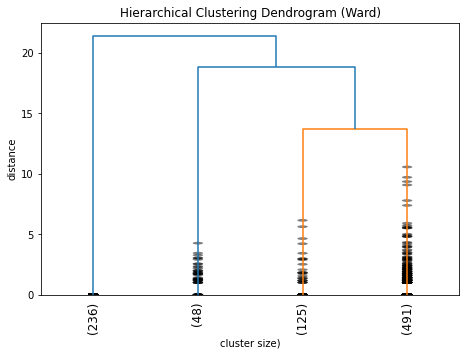

In [31]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linked,
    truncate_mode='lastp',
    p=4,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('cluster size)')
plt.ylabel('distance')
plt.show()

Så Ward hjælper os (fra graven). Men kan vi få det til at give mening?

In [25]:
pd.options.mode.chained_assignment = None
for k in range(2,11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward').fit(cluster_subset)
    labels=cluster.labels_
    dbs=davies_bouldin_score(cluster_subset, labels)
    dbs=round(dbs,2)
    ch = metrics.calinski_harabasz_score(cluster_subset, labels)
    ch=round(ch,2)
    ss=metrics.silhouette_score(cluster_subset, labels, metric='euclidean')
    ss=round(ss,2)
    print("Cluster count-", k, "|", " db score-", dbs, "|", " ch score - ", ch, "|", " ss score - ", ss)
    k=str(k)
    cluster_subset['cluster'+k]=labels

Cluster count- 2 |  db score- 1.14 |  ch score -  163.87 |  ss score -  0.19
Cluster count- 3 |  db score- 1.16 |  ch score -  241.32 |  ss score -  0.33
Cluster count- 4 |  db score- 1.49 |  ch score -  296.77 |  ss score -  0.36
Cluster count- 5 |  db score- 1.56 |  ch score -  622.26 |  ss score -  0.42
Cluster count- 6 |  db score- 1.47 |  ch score -  913.91 |  ss score -  0.48
Cluster count- 7 |  db score- 1.1 |  ch score -  1406.34 |  ss score -  0.56
Cluster count- 8 |  db score- 0.94 |  ch score -  1914.41 |  ss score -  0.62
Cluster count- 9 |  db score- 0.79 |  ch score -  2704.09 |  ss score -  0.68
Cluster count- 10 |  db score- 0.64 |  ch score -  3275.79 |  ss score -  0.72


Hurtigt cheat sheet:

Davies Bouldin Score → så lav som muligt

Calinski-Harabasz → så høj som muligt

Silhouette-score → er en -1 to +1 ting. 0 er dårligt, mens værdier tætter på +/-1 er gode.

Hvordan ser det ud, når vi har proppet ting på?

In [26]:
cluster_subset.head()

,criminals,diffrace,leftwings,alcoholics,rightwings,manykids,neurotics,muslims,imigrants,aids,...,gypsies,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,4,4,4,4,1,1
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,6,5,3,4
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,2,5,5,7,5,5
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,2,2,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,9


In [27]:
avg=cluster_subset.groupby(['cluster3']).mean()
avg.head()

,criminals,diffrace,leftwings,alcoholics,rightwings,manykids,neurotics,muslims,imigrants,aids,...,jews,gypsies,cluster2,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10
cluster3,,,,,,,,,,,,,,,,,,,,,
0,0.373377,0.029221,0.087662,0.452922,0.275974,0.029221,0.168831,0.155844,0.077922,0.050325,...,0.012987,0.155844,0.0,0.202922,1.019481,1.613636,1.965909,2.11039,2.761364,3.675325
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,3.000000,2.000000,5.000000,5.000000,7.00000,5.000000,5.000000
2,0.895833,0.937500,0.562500,0.895833,0.416667,0.333333,0.500000,0.979167,0.958333,0.375000,...,0.270833,0.812500,0.0,2.000000,3.000000,3.000000,3.000000,6.00000,4.000000,3.000000


In [29]:
cluster_subset.groupby(['cluster4'])[['criminals', 'diffrace', 'leftwings', 'alcoholics', 'rightwings', 'manykids', 'neurotics', 'muslims', 'imigrants', 'aids', 'addicts', 'homoseksuals', 'jews', 'gypsies']].mean()

,criminals,diffrace,leftwings,alcoholics,rightwings,manykids,neurotics,muslims,imigrants,aids,addicts,homoseksuals,jews,gypsies
cluster4,,,,,,,,,,,,,,
0,0.409369,0.03666,0.04277,0.496945,0.107943,0.030550,0.211813,0.189409,0.093686,0.063136,0.816701,0.091650,0.016293,0.183299
1,0.232000,0.00000,0.26400,0.280000,0.936000,0.024000,0.000000,0.024000,0.016000,0.000000,0.688000,0.000000,0.000000,0.048000
2,0.895833,0.93750,0.56250,0.895833,0.416667,0.333333,0.500000,0.979167,0.958333,0.375000,0.958333,0.479167,0.270833,0.812500
3,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Her er det i sin simple udgave, hvor vi ikke længere skal forholde os til et loop men har vurderet at det er 5 klynger vi har lyst til at lave:

In [32]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(cluster_subset)
labels=cluster.labels_
cluster_df['cluster']=labels

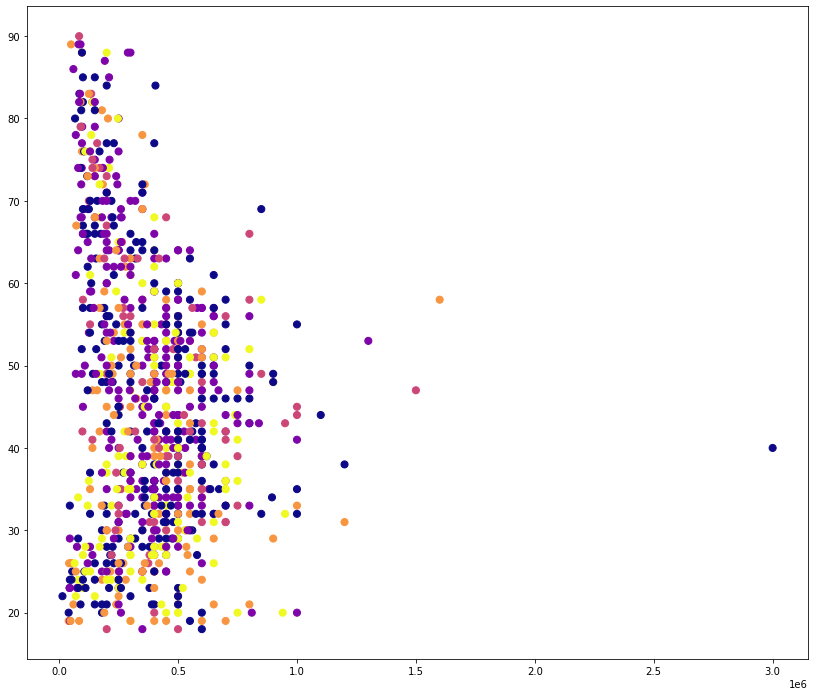

In [33]:
plt.figure(figsize=(14, 12))
plt.scatter(cluster_df.income, cluster_df.age, s=50, c=cluster_df.cluster, cmap='plasma')

Husk, det er lidt ligesom at tale med Lassie - vi er ikke helt sikre på, hvad det er hun prøver at sige, men vi håber det er fedt!

![lassie](https://cdn2.lamag.com/wp-content/uploads/sites/6/2018/07/Lassie_Jon_Provost_1961-1068x689.jpg)

Legetid! Tjek det her ud:

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

In [35]:
df1=pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv')

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v7      1023 non-null   int64  
 1   v9      1023 non-null   int64  
 2   v10     1023 non-null   object 
 3   v14     1023 non-null   int64  
 4   v56     1023 non-null   object 
 5   v57     1023 non-null   object 
 6   v58     1023 non-null   object 
 7   v59     1023 non-null   object 
 8   v60     1023 non-null   object 
 9   v61     1023 non-null   object 
 10  v104    1023 non-null   object 
 11  v105    1023 non-null   object 
 12  v106    1023 non-null   object 
 13  v107    1023 non-null   object 
 14  v108    1023 non-null   object 
 15  v109    1023 non-null   object 
 16  v110    1023 non-null   object 
 17  v111    1023 non-null   object 
 18  v112    1023 non-null   object 
 19  v113    1023 non-null   object 
 20  v114    1023 non-null   object 
 21  v115    1023 non-null   object 
 22  

In [14]:
df1.apply(pd.to_numeric)

,v7,v9,v10,v14,v56,v57,v58,v59,v60,v61,...,v261,v262,v263,v264,v265,v266,v267,v268,v269,bald
1,1,1,2,0,1,1,2,2,1,1,...,1,1,2,2,2,1,2,2,1,30
2,1,1,2,0,1,1,1,1,1,2,...,2,2,2,1,2,2,2,1,1,57
7,1,1,2,0,1,1,2,1,3,4,...,2,2,3,3,4,2,2,2,3,32
9,1,1,1,1,1,1,1,2,2,3,...,2,2,2,2,3,2,2,2,2,58
10,1,1,2,0,1,2,2,3,1,4,...,2,2,2,2,4,3,2,2,2,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,2,1,2,0,2,1,1,2,2,3,...,1,2,3,2,2,1,1,2,1,24
1010,1,1,1,2,2,2,2,1,4,4,...,3,2,3,3,3,3,3,3,3,40
1015,2,1,1,3,2,2,2,2,3,3,...,2,3,3,3,4,3,3,3,2,40
1018,1,1,1,2,2,1,1,1,2,2,...,2,2,2,3,2,2,2,3,2,47


In [37]:
cols = ['v256', 'v257']
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [11]:
import numpy as np
df1 = df1.replace({".": np.nan})
df1.dropna(inplace=True)

In [38]:
df1.groupby(

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 1 to 1021
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v7      301 non-null    int64 
 1   v9      301 non-null    int64 
 2   v10     301 non-null    object
 3   v14     301 non-null    int64 
 4   v56     301 non-null    object
 5   v57     301 non-null    object
 6   v58     301 non-null    object
 7   v59     301 non-null    object
 8   v60     301 non-null    object
 9   v61     301 non-null    object
 10  v104    301 non-null    object
 11  v105    301 non-null    object
 12  v106    301 non-null    object
 13  v107    301 non-null    object
 14  v108    301 non-null    object
 15  v109    301 non-null    object
 16  v110    301 non-null    object
 17  v111    301 non-null    object
 18  v112    301 non-null    object
 19  v113    301 non-null    object
 20  v114    301 non-null    object
 21  v115    301 non-null    object
 22  v116    301 non-null    o

In [9]:
column = df1["v256"]
max_value = column.min()

In [10]:
max_value

'1'

In [30]:
df1.groupby(["v7"]).mean()

,v9,v14,v256,v257,bald
v7,,,,,
1,1.30754,1.581349,2.463158,2.340816,45.825397
2,1.28131,1.745665,2.305907,2.370526,45.626204
